# Visualizing categorical data
  
In the `relational plot tutorial` we saw how to use different visual representations to show the relationship between multiple variables in a dataset. In the examples, we focused on cases where the main relationship was between two numerical variables. If one of the main variables is "categorical" (divided into discrete groups) it may be helpful to use a more specialized approach to visualization.

In seaborn, there are several different ways to visualize a relationship involving categorical data. Similar to the relationship between `relplot` and either `scatterplot` or `lineplot`, there are two ways to make these plots. There are a number of axes-level functions for plotting categorical data in different ways and a figure-level interface, `catplot`, that gives unified higher-level access to them.

It's helpful to think of the different categorical plot kinds as belonging to three different families, which we'll discuss in detail below. They are:

Categorical scatterplots:

- `stripplot` (with ``kind="strip"``; the default)
- `swarmplot` (with ``kind="swarm"``)

Categorical distribution plots:

- `boxplot` (with ``kind="box"``)
- `violinplot` (with ``kind="violin"``)
- `boxenplot` (with ``kind="boxen"``)

Categorical estimate plots:

- `pointplot` (with ``kind="point"``)
- `barplot` (with ``kind="bar"``)
- `countplot` (with ``kind="count"``)

These families represent the data using different levels of granularity. When deciding which to use, you'll have to think about the question that you want to answer. The unified API makes it easy to switch between different kinds and see your data from several perspectives.

In this tutorial, we'll mostly focus on the figure-level interface, `catplot`. Remember that this function is a higher-level interface each of the functions above, so we'll reference them when we show each kind of plot, keeping the more verbose kind-specific API documentation at hand.

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks", color_codes=True)
np.random.seed(sum(map(ord, "categorical")))

## Categorical scatterplots
------------------------

The default representation of the data in `catplot` uses a scatterplot. There are actually two different categorical scatter plots in seaborn. They take different approaches to resolving the main challenge in representing categorical data with a scatter plot, which is that all of the points belonging to one category would fall on the same position along the axis corresponding to the categorical variable. The approach used by `stripplot`, which is the default "kind" in `catplot` is to adjust the positions of points on the categorical axis with a small amount of random "jitter":

In [6]:
tips = sns.load_dataset("tips")
print(tips.info())
tips.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB
None


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


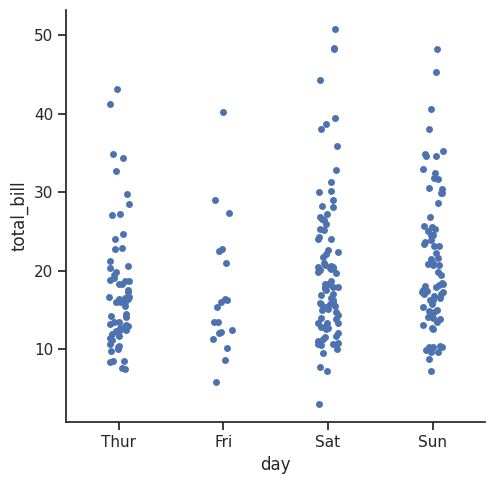

In [7]:
# Create a categorical plot
sns.catplot(data=tips, x="day", y="total_bill") # data=tips, x="day", y="total_bill"

The ``jitter`` parameter controls the magnitude of jitter or disables it altogether:

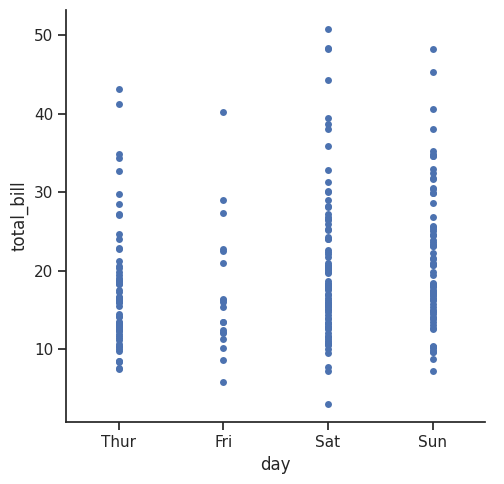

In [8]:
# Modify the plot to remove jitter
sns.catplot(data=tips, x="day", y="total_bill", # data=tips, x="day", y="total_bill"
            jitter=False) # jitter=False

The second approach adjusts the points along the categorical axis using an algorithm that prevents them from overlapping. It can give a better representation of the distribution of observations, although it only works well for relatively small datasets. This kind of plot is sometimes called a "beeswarm" and is drawn in seaborn by `swarmplot`, which is activated by setting ``kind="swarm"`` in `catplot`:

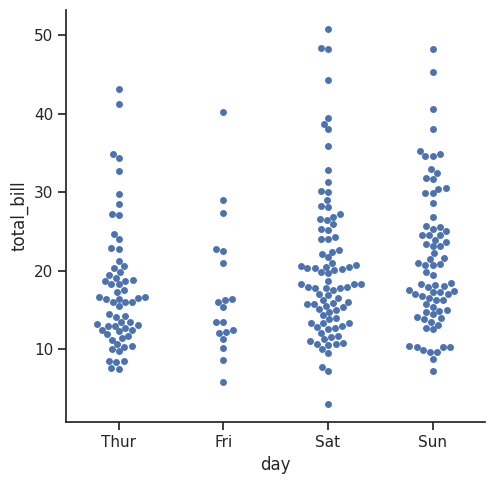

In [10]:
# Add hue to the categorical plot
sns.catplot(data=tips, x="day", y="total_bill", # data=tips, x="day", y="total_bill"
            kind="swarm") # kind="swarm" to differentiate points

Similar to the relational plots, it's possible to add another dimension to a categorical plot by using a ``hue`` semantic. (The categorical plots do not  support ``size`` or ``style`` semantics). Each different categorical plotting function handles the ``hue`` semantic differently. For the scatter plots, it is only necessary to change the color of the points:

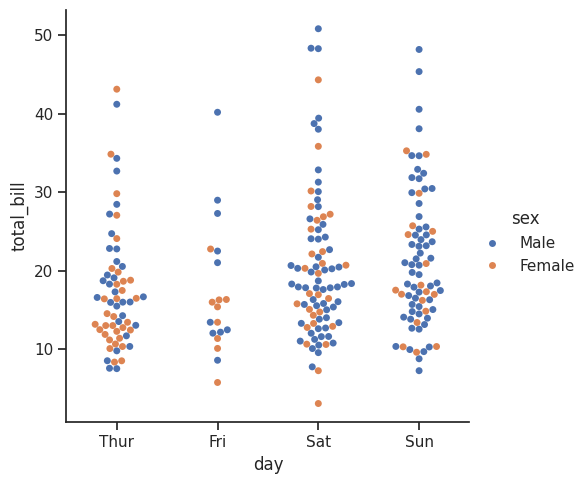

In [ ]:
# Add hue to the categorical plot
sns.catplot(data=tips, x="day", y="total_bill", # data=tips, x="day", y="total_bill"
            hue="sex", #set the hue to sex
            kind="swarm") # kind="swarm"

Unlike with numerical data, it is not always obvious how to order the levels of the categorical variable along its axis. In general, the seaborn categorical plotting functions try to infer the order of categories from the data. If your data have a pandas ``Categorical`` datatype, then the default order of the categories can be set there. If the variable passed to the categorical axis looks numerical, the levels will be sorted. But, by default, the data are still treated as categorical and drawn at ordinal positions on the categorical axes (specifically, at 0, 1, ...) even when numbers are used to label them:

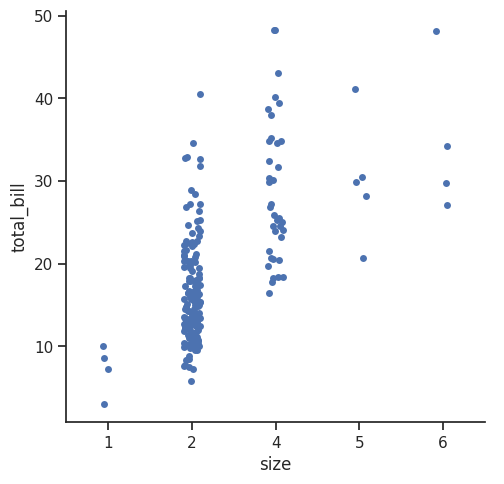

In [11]:
# Filter the data to exclude size 3 and create the plot
sns.catplot(data=tips.query("size != 3"), x="size", y="total_bill") # dataset, x, y. For the dataset, filter size not equal to 3

Categorical plotting functions have a `native_scale` parameter, which can be set to `True` when you want to use numeric or datetime data for categorical grouping without changing the underlying data properties: 

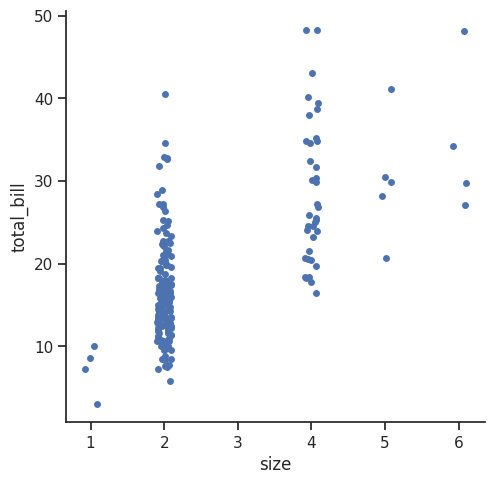

In [ ]:
# Use native scale for better visualization
sns.catplot(data=tips.query("size != 3"), x="size", y="total_bill", # dataset, x, y, filter to remove size 3
            native_scale=True) # native_scale=True, this will scale the points according to size to now include 3, even though it is filtered out

The other option for choosing a default ordering is to take the levels of the category as they appear in the dataset. The ordering can also be controlled on a plot-specific basis using the ``order`` parameter. This can be important when drawing multiple categorical plots in the same figure, which we'll see more of below:

In [13]:
#show unique values in smoker column
print(tips['smoker'].unique())

['No', 'Yes']
Categories (2, object): ['Yes', 'No']


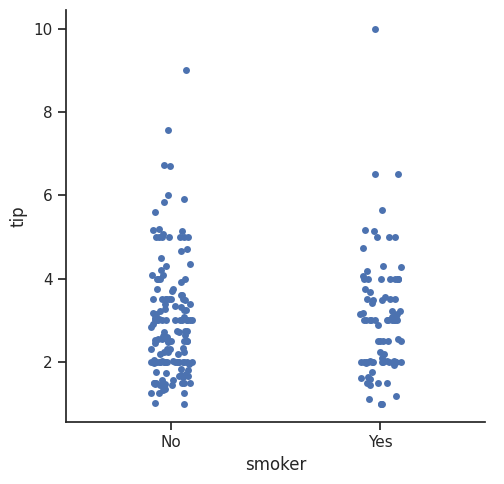

In [14]:
# Create a categorical plot with specific order
sns.catplot(data=tips, x="smoker", y="tip", #set dataset, x, y
            order=["No", "Yes"]) #set order for x-axis categories, from the tips dataset, smoker column

We've referred to the idea of "categorical axis". In these examples, that's always corresponded to the horizontal axis. But it's often helpful to put the categorical variable on the vertical axis (particularly when the category names are relatively long or there are many categories). To do this, swap the assignment of variables to axes:

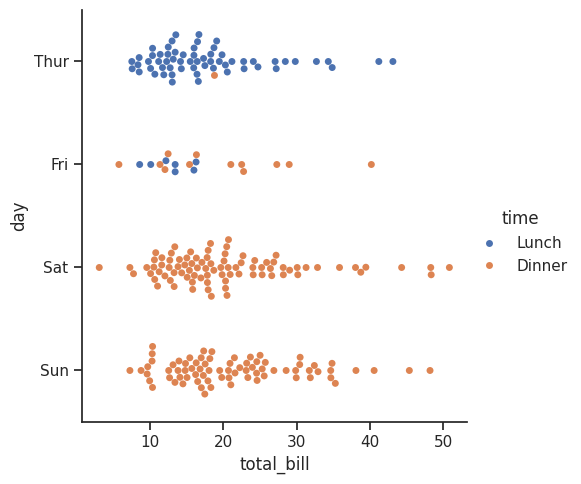

In [15]:
# change the x and y axis to have a horrizontal plot
sns.catplot(data=tips, x="total_bill", y="day", #set dataset, x, y
            hue="time", #set hue to time of day
            kind="swarm")# kind="swarm" for better point distribution

## Comparing distributions
-----------------------

As the size of the dataset grows, categorical scatter plots become limited in the information they can provide about the distribution of values within each category. When this happens, there are several approaches for summarizing the distributional information in ways that facilitate easy comparisons across the category levels.

### Boxplots

The first is the familiar `boxplot`. This kind of plot shows the three quartile values of the distribution along with extreme values. The "whiskers" extend to points that lie within 1.5 interquartile range of the lower and upper quartile, and then observations that fall outside this range are displayed independently. This means that each value in the boxplot corresponds to an actual observation in the data.

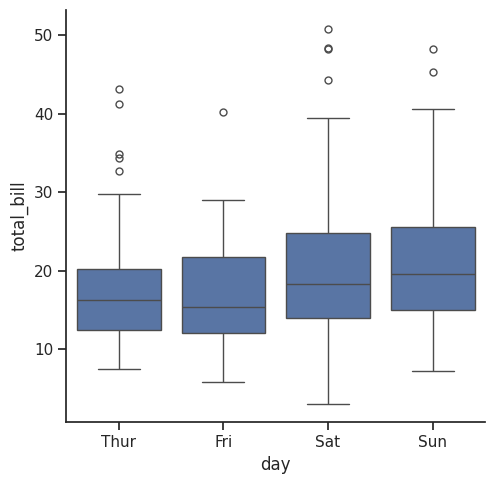

In [16]:
# Create a box plot
sns.catplot(data=tips, x="day", y="total_bill", #set dataset, x, y
            kind="box") # kind="box"

When adding a ``hue`` semantic, the box for each level of the semantic variable is made narrower and shifted along the categorical axis:

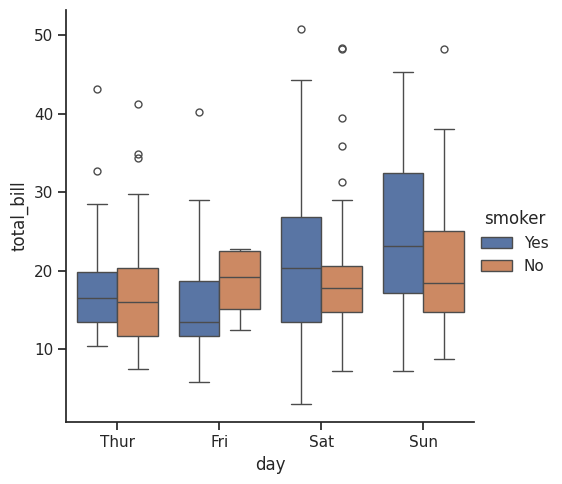

In [ ]:
# Create a box plot with hue, this will create separate boxes for smokers and non-smokers
sns.catplot(data=tips, x="day", y="total_bill", #set dataset, x, y
            hue="smoker", #set hue to smoker status, this will create separate boxes for smokers and non-smokers
            kind="box")# kind="box"

This behavior is called "dodging", and it is controlled by the `dodge` parameter, elements dodge only if they would otherwise overlap:

In [19]:
#create a new column weekend that is True if the day is Saturday or Sunday
tips["weekend"] = tips["day"].isin(["Sat", "Sun"])
print(tips["weekend"].unique())
tips.head()

[ True False]


,total_bill,tip,sex,smoker,day,time,size,weekend
0,16.99,1.01,Female,No,Sun,Dinner,2,True
1,10.34,1.66,Male,No,Sun,Dinner,3,True
2,21.01,3.50,Male,No,Sun,Dinner,3,True
3,23.68,3.31,Male,No,Sun,Dinner,2,True
4,24.59,3.61,Female,No,Sun,Dinner,4,True


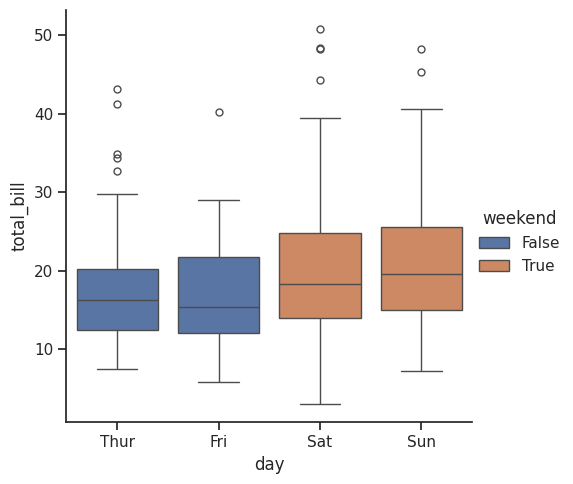

In [ ]:
# Create a box plot with hue based on weekend status
sns.catplot(data=tips, x="day", y="total_bill", #set dataset, x, y
            hue="weekend",  #set hue to weekend status, note that since there is no overlap between day and weekend, the boxes will be the same as without hue, just a different color
            kind="box") # kind="box"

A related function, `boxenplot`, draws a plot that is similar to a box plot but optimized for showing more information about the shape of the distribution. It is best suited for larger datasets:

In [25]:
#load the diamonds dataset
diamonds = sns.load_dataset("diamonds")
print(diamonds.info())
diamonds.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB
None


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


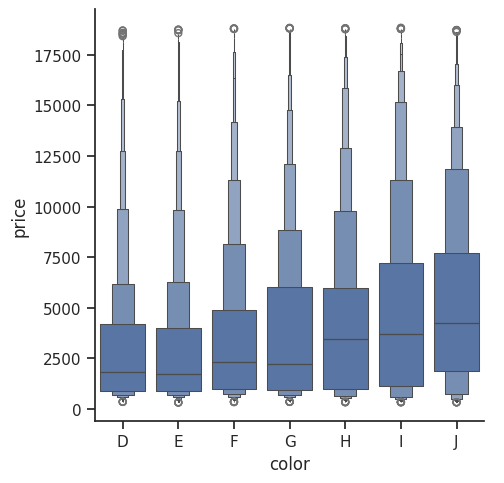

In [31]:
# Create a boxen plot of price by color, sorting the colors for better visualization
sns.catplot(
    data=diamonds, x="color", y="price", #set dataset, x, y
    kind="boxen",# kind="boxen" for better visualization of large datasets
)

## Violinplots


A different approach is a `violinplot`, which combines a boxplot with the kernel density estimation procedure described in the `distributions` tutorial:

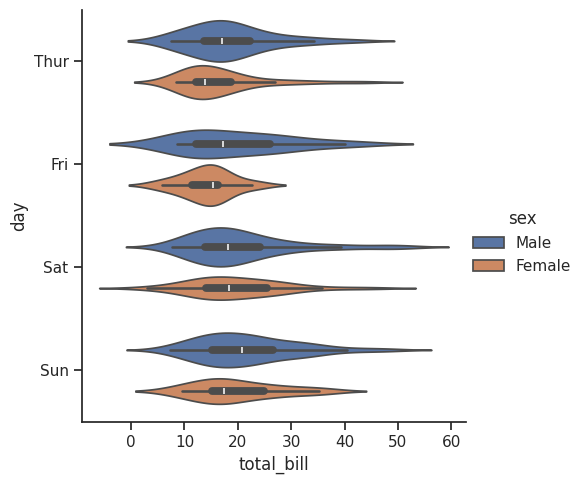

In [32]:
# Create a violin plot of total_bill by day, with hue based on sex
sns.catplot(
    data=tips, x="total_bill", y="day", #set dataset, x, y
    hue="sex", #set hue to sex
    kind="violin",# kind="violin" for better visualization of distribution
)

This approach uses the kernel density estimate to provide a richer description of the distribution of values. Additionally, the quartile and whisker values from the boxplot are shown inside the violin. The downside is that, because the violinplot uses a KDE, there are some other parameters that may need tweaking, adding some complexity relative to the straightforward boxplot:

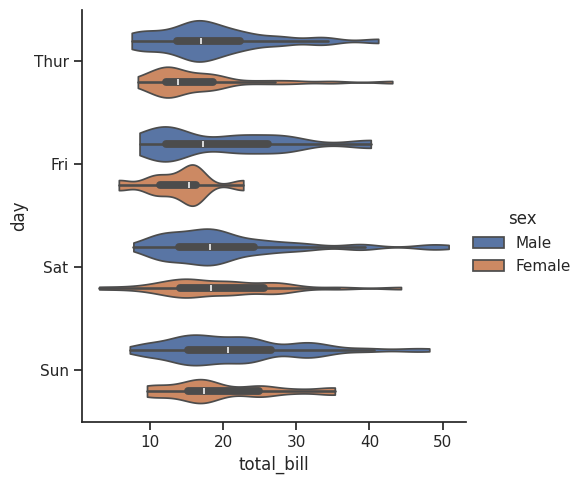

In [ ]:
#update the plot above by adjusting the bandwidth and cut parameters, to make it more compact and visually appealing
sns.catplot(
    data=tips, x="total_bill", y="day", #set dataset, x, y
    hue="sex",#set hue to sex
    kind="violin", # kind="violin" for better visualization of distribution
    bw_adjust=.5, # adjust the bandwidth to make the plot more compact
    cut=0,# cut=0 to limit the range of the violin plot to the data range only, values below 0 are unrealistic
)

It's also possible to "split" the violins, which can allow for a more efficient use of space:

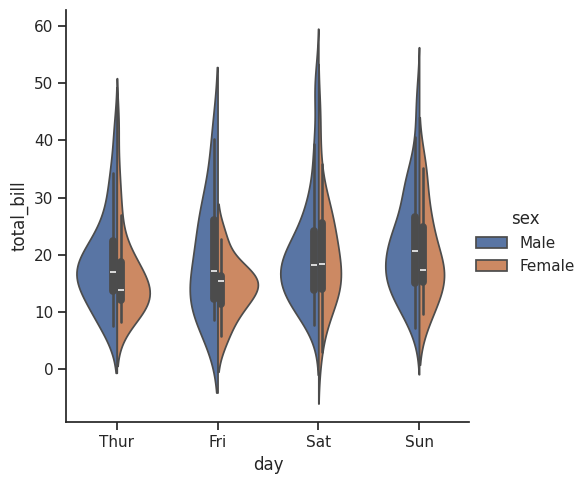

In [ ]:
# Create a split violin plot of total_bill by day
sns.catplot(
    data=tips, x="day", y="total_bill",  #set dataset, x, y, notice that we swapped x and y compared to previous plots
    hue="sex", #set hue to  sex
    kind="violin", # kind="violin" for better visualization of distribution
    split=True, # split=True to create a split violin plot, this makes it easier to compare the distributions as they are no longer side by side but overlapping
)

Finally, there are several options for the plot that is drawn on the interior of the violins, including ways to show each individual observation instead of the summary boxplot values:

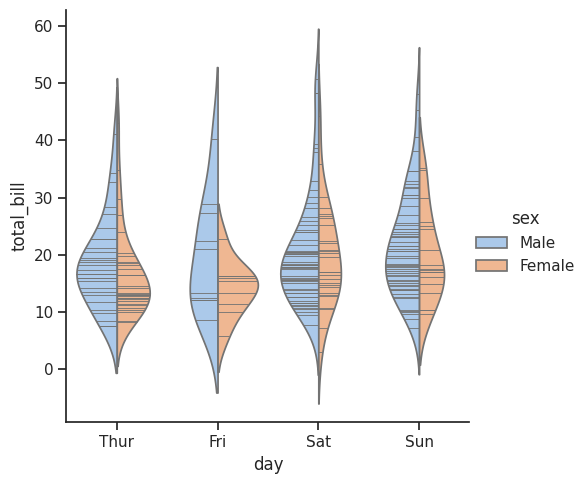

In [ ]:
#Update the split violin plot to include inner sticks to show individual data points
sns.catplot(
    data=tips, x="day", y="total_bill", #set dataset, x, y
    hue="sex", #set hue to  sex
    kind="violin", # kind="violin"
    inner="stick", #show individual data points as sticks
    split=True, #split the violins, just as above
    palette="pastel", #set a pastel color palette, other colors are available and can be found here: https://seaborn.pydata.org/tutorial/color_palettes.html
)

It can also be useful to combine `swarmplot` or `stripplot` with a box plot or violin plot to show each observation along with a summary of the distribution:

<Axes: xlabel='day', ylabel='total_bill'>

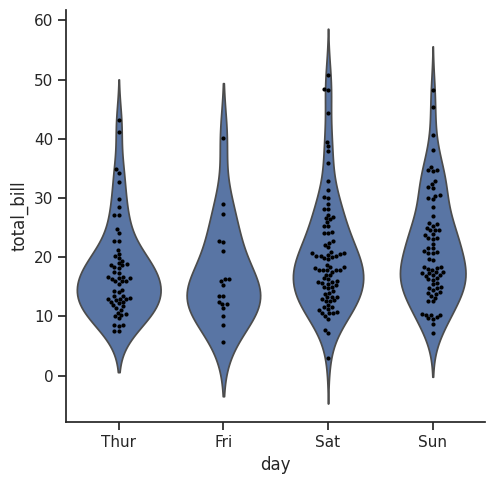

In [ ]:
# Create a violin plot of total_bill by day without hue, and overlay swarmplot to show individual data points
g = sns.catplot(data=tips, x="day", y="total_bill", #Assign the sns.catplot to variable g, set dataset, x, y
                kind="violin", # set the kind to violin
                inner=None) # inner=None to remove the inner markings as this  is where the swarmplot will go
sns.swarmplot(data=tips, x="day", y="total_bill",  #overlay swarmplot on top of the violin plot, set the dataset, x, y to the same as the violin plot
              color="black", # set the color to black, try using other colors like "red", "blue", etc.
              size=3, # size of the points, try changing this value to see how it affects the plot
              ax=g.ax) # use the ax from the violin plot to overlay the swarmplot correctly

## Estimating central tendency
---------------------------

For other applications, rather than showing the distribution within each category, you might want to show an estimate of the central tendency of the values. Seaborn has two main ways to show this information. Importantly, the basic API for these functions is identical to that for the ones discussed above.

### Bar plots

A familiar style of plot that accomplishes this goal is a bar plot. In seaborn, the `barplot` function operates on a full dataset and applies a function to obtain the estimate (taking the mean by default). When there are multiple observations in each category, it also uses bootstrapping to compute a confidence interval around the estimate, which is plotted using error bars.

### What is bootstrapping?

* SNS randomly selects data points with each category and resamples them (with replacement) thousands of times, creating thousands of sample datasets.

* It calculates the mean for each sample.

* SNS calculates the Confidence Interval (CI), a range where 95% of the means fall. This tells you: "We are 95% sure the true average is between x and y."

In [38]:
#load the titantic dataset
titanic = sns.load_dataset("titanic")
print(titanic.info())
titanic.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


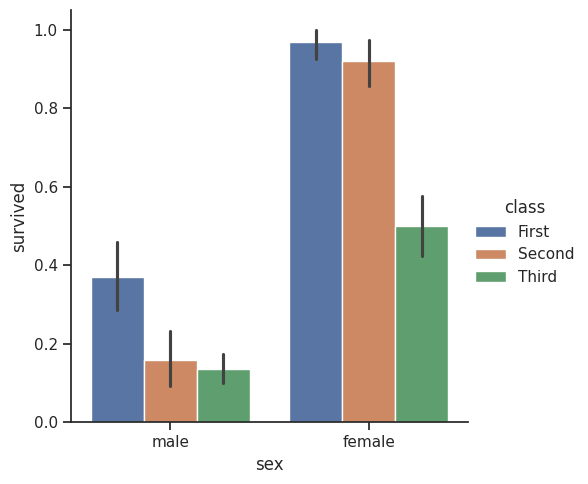

In [ ]:
# Create a bar plot showing survival
sns.catplot(data=titanic, x="sex", y="survived", #set dataset, x, y, the values in the survived column are 0 and 1, so the mean will give the survival rate
            hue="class", #set hue to passenger class
                    kind="bar")# kind="bar"
#notice the lines above each bar indicating the confidence interval for the mean survival rate, we are certain the true mean survival rate for that group lies within that interval

The default error bars show 95% confidence intervals,  it is possible to select from a number of other representations:

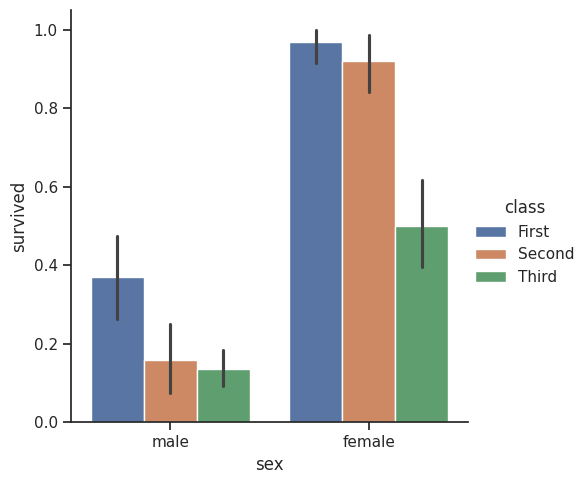

In [ ]:
# Create a bar plot showing average age by deck with 99% prediction interval
sns.catplot(data=titanic, x="sex", y="survived", #set dataset, x, y
            hue="class", #set hue to passenger class
            errorbar=("ci", 99), # set errorbar to confidence interval with 99% confidence, adjust this parameter to see what happens to the interval, you can change "ci", "pi", "se", "sd" to see other intervals instead
            kind="bar") # kind="bar"

A special case for the bar plot is when you want to show the number of observations in each category rather than computing a statistic for a second variable. This is similar to a histogram over a categorical, rather than quantitative, variable. In seaborn, it's easy to do so with the `countplot` function:

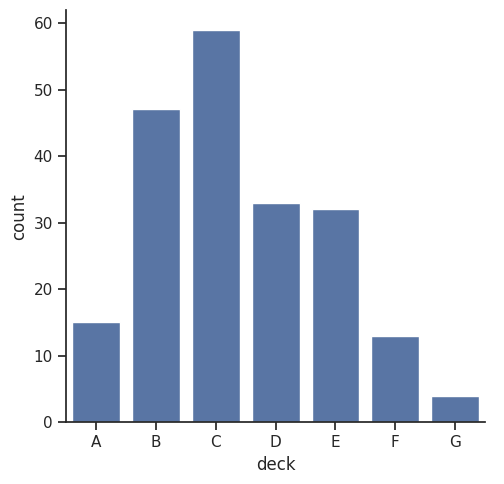

In [53]:
# Create a count plot of passengers by deck
sns.catplot(data=titanic, x="deck", #set dataset, x
           # hue="class", #set hue to passenger class
            kind="count") # kind="count" to count number of passengers in each deck

Both `barplot` and `countplot` can be invoked with all of the options discussed above, along with others that are demonstrated in the detailed documentation for each function:

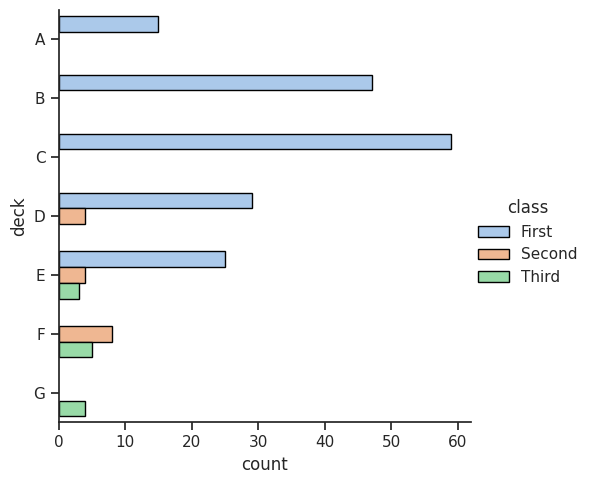

In [ ]:
# Create a count plot of passengers by deck with hue based on passenger class
sns.catplot(
    data=titanic, y="deck", hue="class", #set dataset, y, hue, note we swapped x and y for a different visualization, if you have a lot of categories on x, swapping to the y can help with readability
    kind="count", # kind="count"
    palette="pastel", #set a pastel color palette
    edgecolor="black", #set edge color for better visibility, try other color options
)

## Point plots

An alternative style for visualizing the same information is offered by the `pointplot` function. This function also encodes the value of the estimate with height on the other axis, but rather than showing a full bar, it plots the point estimate and confidence interval. Additionally, `pointplot` connects points from the same ``hue`` category. This makes it easy to see how the main relationship is changing as a function of the hue semantic, because your eyes are quite good at picking up on differences of slopes:

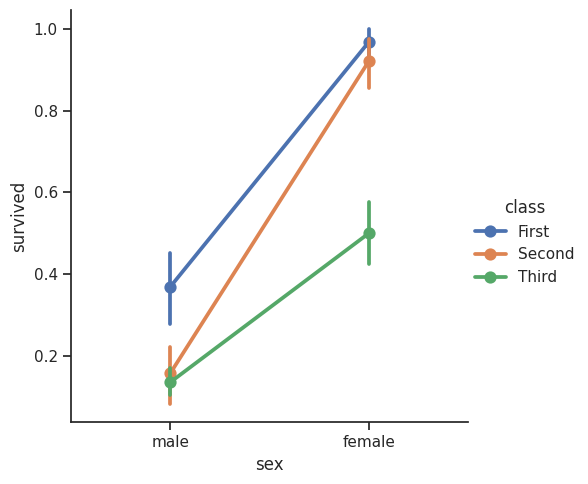

In [ ]:
# Create a point plot showing survival
sns.catplot(data=titanic, x="sex", y="survived", #set dataset, x, y
            hue="class", #set hue to passenger class
            kind="point" #set kind to point, notice how the points are connected to show trends. Here we see the slopes of survival rates across classes between sex
            )

While the categorical functions lack the ``style`` semantic of the relational functions, it can still be a good idea to vary the marker and/or linestyle along with the hue to make figures that are maximally accessible and reproduce well in black and white:

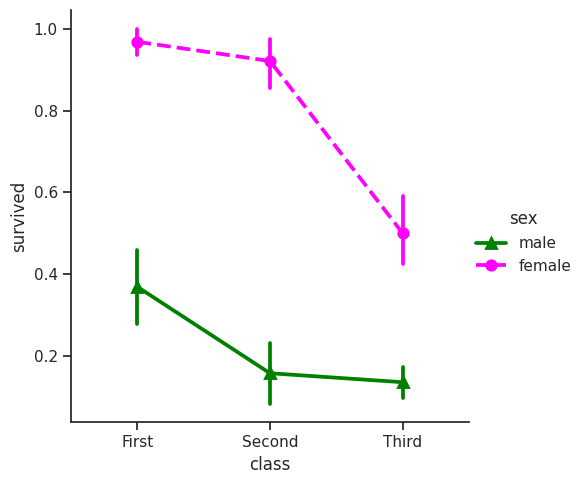

In [59]:
# Customize the point plot with different colors, markers, and line styles
sns.catplot(
    data=titanic, x="class", y="survived",  #set dataset, x, y
    hue="sex", #set hue to sex, the column categories are "male" and "female"
    palette={"male": "green", "female": "magenta"}, #custom color palette for male and female, this forms a dictiornary mapping the category names to colors
    markers=["^", "o"], # we have to uniquely identify the markers for each category in hue
    linestyles=["-", "--"], # we have to uniquely identify the line styles for each category in hue
    kind="point" #set kind to point, just as above
)

## Showing additional dimensions
-----------------------------

Just like `relplot`, the fact that `catplot` is built on a `FacetGrid` means that it is easy to add faceting variables to visualize higher-dimensional relationships:

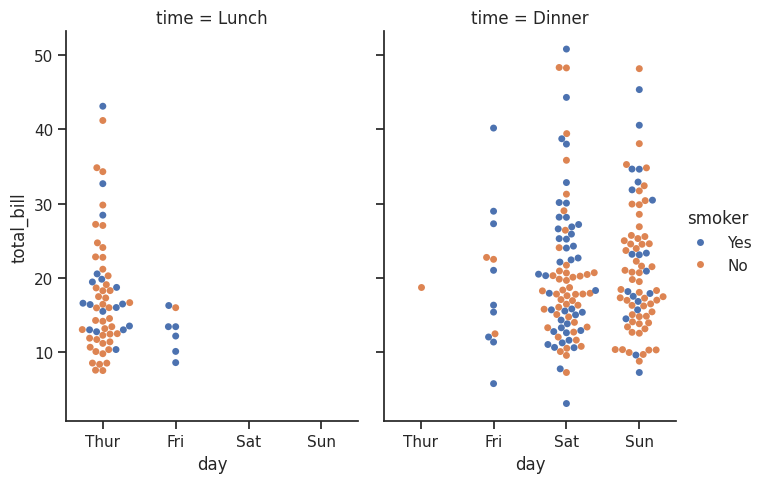

In [ ]:
#Use catplot to create a swarm plot of total_bill by day, with hue based on smoker status, and separate columns for time of day using faceting
sns.catplot(
    data=tips, x="day", y="total_bill", #set dataset, x, y
    hue="smoker", #set hue to smoker
    kind="swarm",  # kind="swarm" to make point distribution clear
    col="time", #create separate columns for time of day, this makes use of faceting to create multiple plots based on the time column
    aspect=.7,# adjust the aspect ratio for better visualization, adjust this value to see how it affects the plot
)

For further customization of the plot, you can use the methods on the `FacetGrid` object that it returns:

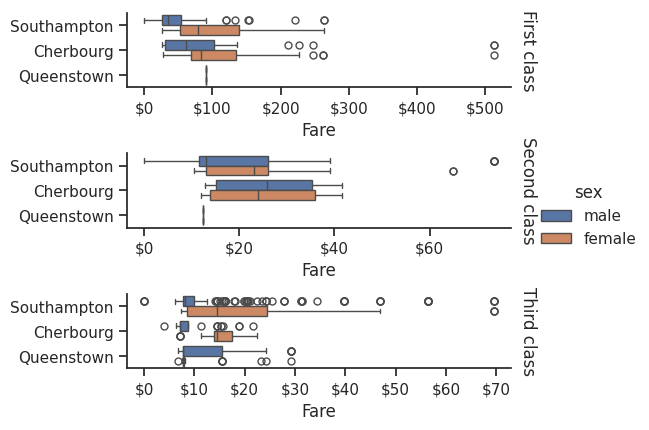

In [65]:
# Create a box plot of fare by embark_town, with separate rows for each passenger class using faceting, assign the plot to variable g for further customization
g = sns.catplot( #make out plot variable g for further customization
    data=titanic, x="fare", y="embark_town", #set dataset, x, y
    hue="sex", #set hue to sex
    row="class", #set rows based on passenger class, this will trigger a facet grid with separate rows for each class
    kind="box", # kind="box" set the plot type
    orient="h", # horizontal orientation for the box plots
    sharex=False,  #sharex=False to allow each row to have its own x-axis scale
    margin_titles=True, # set margin_titles=True to display the row titles in the margins
    height=1.5, #adjust the height of each facet
    aspect=4, #adjust the aspect ratio for better visualization, this accounts for our height input, making the width 4 times the height
)
g.set(xlabel="Fare", ylabel="") #set x and y labels
g.set_titles(row_template="{row_name} class") #set custom titles for each row using the row_template parameter, {row_name} will be replaced with the actual row value gather from g

# Format the x-axis to show dollar amounts by using a for loop to iterate through each axis in the facet grid and applying a dollar formatter
for ax in g.axes.flat: #g.axes.flat gives us a flat iterator. For example, if there are 3 rows, g.axes is a 3x1 array of axes, and g.axes.flat allows us to iterate through them in a single loop
    ax.xaxis.set_major_formatter('${x:.0f}') #set the x-axis major formatter to display dollar amounts with no decimal places for each ax. The {x:.0f} is a format string that formats the number as a float with 0 decimal places

## Activity

Use the above plotting methods to explore what had a more substantial impact on ticket price for all classes: sex or embark town.

Now we will explore [Multiplot Grids](./axis_grids.ipynb)